# PCA dimensionality reduction v2 on full cohort

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from src.feature_selection import analyse_pca, find_n_components, find_max_contributor

## Read in scaled features

In [2]:
df = pd.read_csv("../data/cohort_features_scaled_v2_full_cohort.csv", index_col="ID")
df.head(5)

,n_stays,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,heart_rate_max,temperature_min,temperature_max,nbpm_min,...,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.863636,1,-0.977242,-1.333333,0.684211,0.423077,-0.250,0.421053,-1.1250,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.863636,1,-1.405622,-1.333333,1.263158,0.730769,1.000,1.473684,-1.7500,...,0,0,1,1,0,0,0,0,1,1
2,0.0,-0.363636,0,2.631861,0.533333,0.210526,1.884615,-1.250,0.000000,0.4375,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.772727,1,-0.550647,0.333333,-0.526316,1.538462,-0.125,-0.210526,-0.4375,...,0,0,0,1,0,0,0,0,0,1
4,0.0,0.136364,0,-0.975457,-0.466667,0.526316,0.576923,2.375,0.842105,0.7500,...,0,0,0,0,0,0,0,0,1,1


## Find number of components required

Target explained variance 90%

In [3]:
# Fit the PCA estimator using maximum number of features
pca = PCA(
    n_components=len(df.columns.values),
    random_state=42
)
pca.fit(df)

# Find the number of components required
explained_variance_required = 99.5
n_components = find_n_components(pca, explained_variance_required)
n_components

2

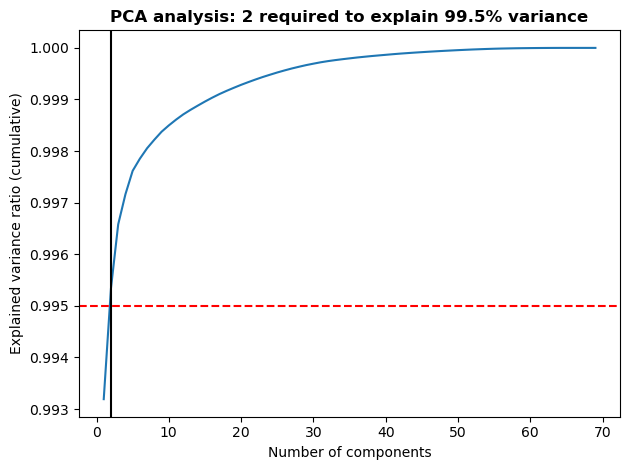

In [4]:
analyse_pca(df, explained_variance_required)

## Find the biggest contributors to each of the components

PCA can be used for feature selection by finding the biggest features to each of the principal components.

In [4]:
# Fit the PCA using the required number of components
pca = PCA(n_components=2, random_state=42)
pca.fit(df)

PCA(n_components=2, random_state=42)

In [5]:
pca.explained_variance_ratio_

array([0.99319116, 0.00214945])

In [6]:
components = pd.DataFrame({
    "PC1": pca.components_[0],
    "PC1_abs": np.abs(pca.components_[0]),
    "PC2": pca.components_[1],
    "PC2_abs": np.abs(pca.components_[1])
})
components["feature_name"] = df.columns
components

,PC1,PC1_abs,PC2,PC2_abs,feature_name
0,-0.000088,0.000088,0.008161,0.008161,n_stays
1,-0.000216,0.000216,0.003620,0.003620,anchor_age
2,-0.000116,0.000116,0.003992,0.003992,suspected_infection
3,-0.000101,0.000101,0.002877,0.002877,weight
4,0.000001,0.000001,0.000694,0.000694,height_chart
...,...,...,...,...,...
64,-0.000008,0.000008,0.000769,0.000769,dobutamine
65,-0.000004,0.000004,0.000392,0.000392,milrinone
66,0.000187,0.000187,0.001361,0.001361,albumin
67,0.000211,0.000211,0.001802,0.001802,bilirubin


### Find max contributor to PC1 and PC2

In [7]:
# PC1
components.sort_values(by="PC1_abs", ascending=False).head(10)

,PC1,PC1_abs,PC2,PC2_abs,feature_name
31,0.999993,0.999993,-0.000253,0.000253,lactate_min
32,0.003465,0.003465,-0.007991,0.007991,lactate_max
35,0.000414,0.000414,-0.009365,0.009365,ph_min
43,0.000322,0.000322,-0.005301,0.005301,urineoutput
13,0.000322,0.000322,-0.007657,0.007657,rr_min
15,-0.000297,0.000297,-0.999357,0.999357,spo2_min
8,0.000277,0.000277,-0.003482,0.003482,temperature_max
38,-0.000256,0.000256,0.008020,0.008020,pco2_max
23,-0.000229,0.000229,-0.002319,0.002319,glucose_max
1,-0.000216,0.000216,0.003620,0.003620,anchor_age


In [8]:
# PC2
components.sort_values(by="PC2_abs", ascending=False).head(10)

,PC1,PC1_abs,PC2,PC2_abs,feature_name
15,-0.000297,0.000297,-0.999357,0.999357,spo2_min
11,0.000093,0.000093,-0.010961,0.010961,nbps_min
9,0.000039,0.000039,-0.010853,0.010853,nbpm_min
35,0.000414,0.000414,-0.009365,0.009365,ph_min
42,-0.000124,0.000124,0.008847,0.008847,sofa
0,-0.000088,0.000088,0.008161,0.008161,n_stays
7,0.000060,0.000060,-0.008138,0.008138,temperature_min
38,-0.000256,0.000256,0.008020,0.008020,pco2_max
32,0.003465,0.003465,-0.007991,0.007991,lactate_max
16,-0.000104,0.000104,-0.007805,0.007805,spo2_max


## Transform and visualise the dataset by principle components

In [9]:
df_pca = pd.DataFrame(pca.transform(df), columns=["PC1", "PC2"])
df_pca.index.name = "ID"
df_pca.to_csv("../data/cohort_features_pca_v2_full_cohort.csv")
df_pca.head(5)

,PC1,PC2
ID,,
0,-9.032719,11.830255
1,-8.036862,-0.142470
2,-7.746563,-0.244233
3,-9.037547,-0.233491
4,-8.751107,-3.319406


In [11]:
# Merge in LOS labels
df_lab = pd.read_csv("../data/cohort_labels_v2_full_cohort.csv", index_col="ID")
df_pca = pd.merge(left=df_pca, right=df_lab, on="ID")
df_pca.head(5)

,PC1,PC2,sum_los,extended_los
ID,,,,
0,-9.032719,11.830255,2.023843,0
1,-8.036862,-0.142470,12.014028,1
2,-7.746563,-0.244233,2.750729,0
3,-9.037547,-0.233491,6.356898,1
4,-8.751107,-3.319406,5.166100,1


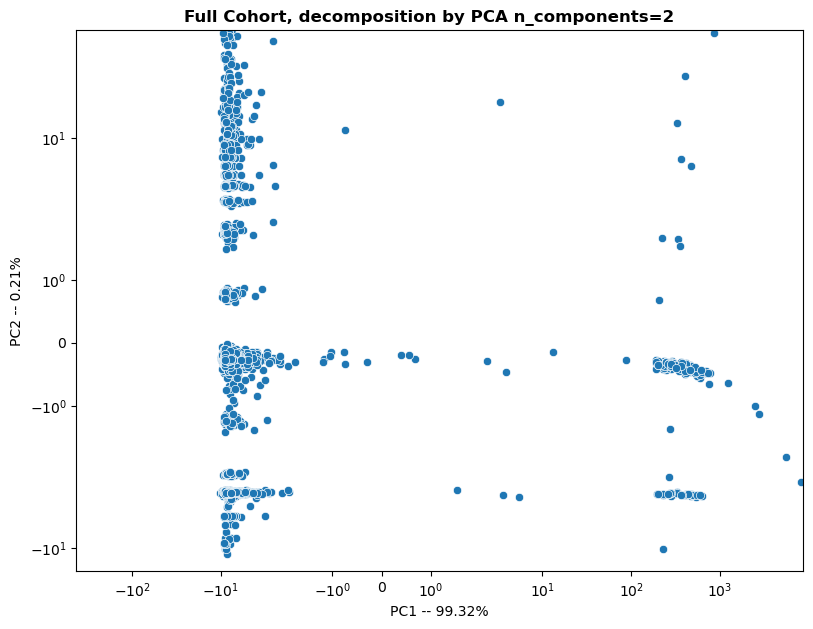

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.tight_layout()

sns.scatterplot(df_pca, x="PC1", y="PC2", ax=ax)

ax.set_xscale("symlog")
ax.set_yscale("symlog")
ax.set_xlabel(f"PC1 -- {(100 * pca.explained_variance_ratio_[0]):.2f}%")
ax.set_ylabel(f"PC2 -- {(100 * pca.explained_variance_ratio_[1]):.2f}%")

fig.suptitle("Full Cohort, decomposition by PCA n_components=2",
             fontweight="semibold", y=1.0)

plt.show()

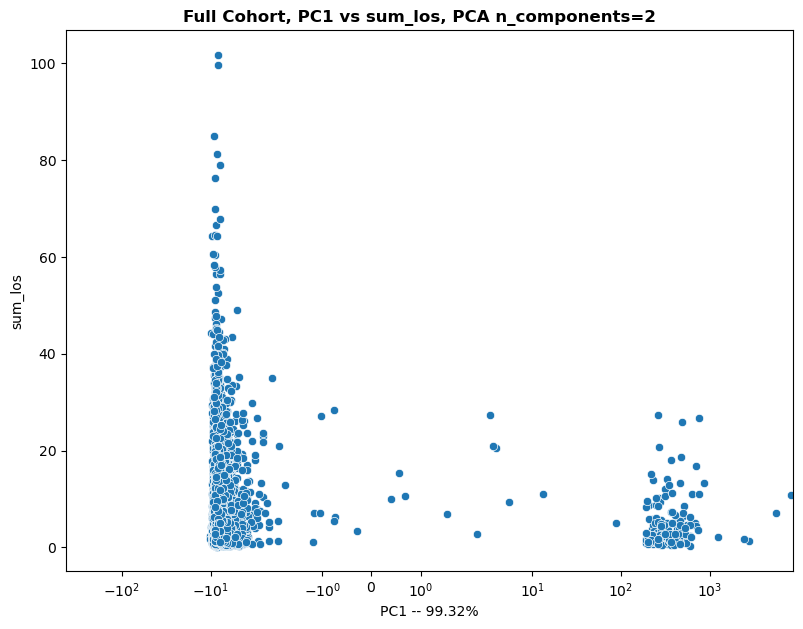

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.tight_layout()

sns.scatterplot(df_pca, x="PC1", y="sum_los", ax=ax)

ax.set_xscale("symlog")
ax.set_xlabel(f"PC1 -- {(100 * pca.explained_variance_ratio_[0]):.2f}%")

fig.suptitle("Full Cohort, PC1 vs sum_los, PCA n_components=2",
             fontweight="semibold", y=1.0)

plt.show()

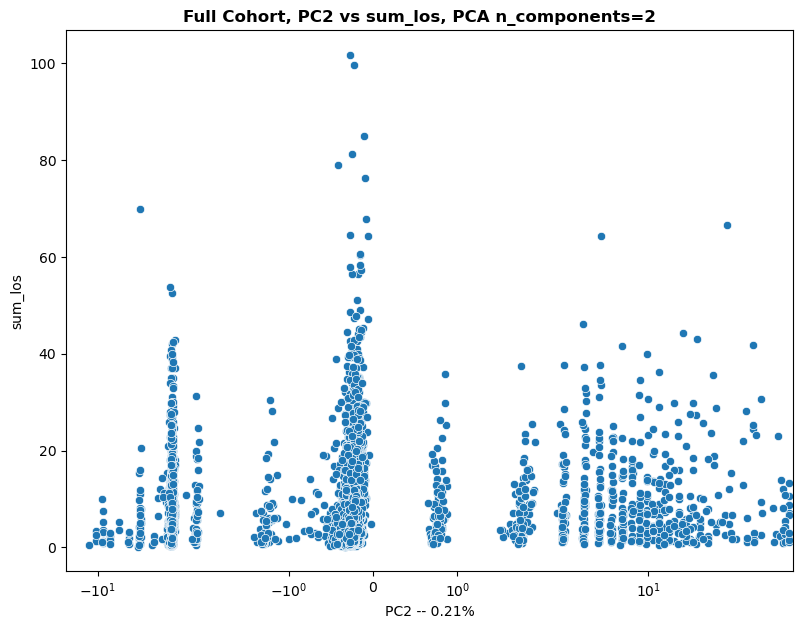

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.tight_layout()

sns.scatterplot(df_pca, x="PC2", y="sum_los", ax=ax)

ax.set_xscale("symlog")
ax.set_xlabel(f"PC2 -- {(100 * pca.explained_variance_ratio_[1]):.2f}%")

fig.suptitle("Full Cohort, PC2 vs sum_los, PCA n_components=2",
             fontweight="semibold", y=1.0)

plt.show()